## Chapter 1.9b: Fault relations
***
In this scenario a fault is offsetting a younger fault in a setting of horzontally stacked layers.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

We import a model from an existing folder.

In [2]:
geo_model = gp.load_model('Tutorial_ch1-9b_Fault_relations', path= '../../data/gempy_models')

Active grids: ['regular']


In [3]:
geo_model.surfaces

,surface,series,order_surfaces,isActive,color,id
7,fault2,fault_series2,1,True,#015482,1
5,fault1,fault_series1,1,True,#9f0052,2
6,rock4,series1,1,True,#ffbe00,3
0,rock3,series1,2,True,#728f02,4
3,rock2,series1,3,True,#443988,5
1,rock1,series1,4,True,#ff3f20,6
4,basement,basement_series,1,True,#325916,7


In [4]:
geo_model.additional_data

values
Structure isLith                                         True
          isFault                                        True
          number faults                                     2
          number surfaces                                   6
          number series                                     4
          number surfaces per series             [1, 1, 4, 0]
          len surfaces surface_points  [9, 9, 15, 15, 12, 12]
          len series surface_points             [9, 9, 54, 0]
          len series orientations               [1, 1, 10, 0]
Options   dtype                                       float64
          output                                      geology
          theano_optimizer                       fast_compile
          device                                          cpu
          verbosity                                       [0]
Kriging   range                                       1732.05
          $C_o$                                       71428.6
          drift equations                        [3, 3, 3, 3]
          nugget grad                                    0.01
          nugget scalar                                 1e-06
Rescaling rescaling factor                               1600
          centers                      [500.0, 500.0, -650.0]

Displaying the input data:

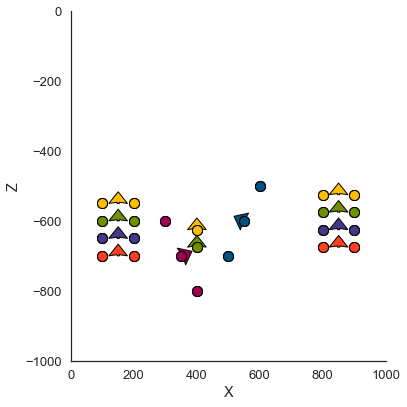

In [5]:
gp.plot.plot_data(geo_model, direction='y')

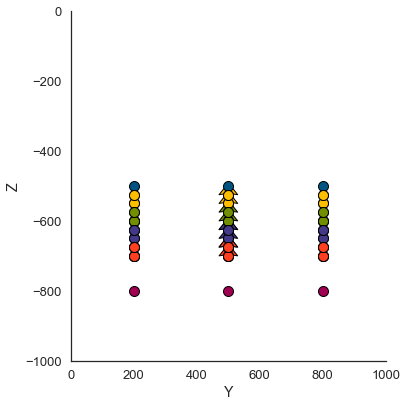

In [6]:
gp.plot.plot_data(geo_model, direction='x')

In [7]:
gp.set_interpolation_data(geo_model)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                        values
range                 1732.05
$C_o$                 71428.6
drift equations  [3, 3, 3, 3]
nugget grad              0.01
nugget scalar           1e-06


In [8]:
geo_model.series

,order_series,BottomRelation,isActive
fault_series2,1,Fault,True
fault_series1,2,Fault,True
series1,3,Erosion,True
basement_series,4,Erosion,False


In [9]:
geo_model.faults

,isFault,isFinite
fault_series2,True,False
fault_series1,True,False
series1,False,False
basement_series,False,False


In [10]:
geo_model.faults.faults_relations_df

,fault_series2,fault_series1,series1,basement_series
fault_series2,False,True,True,True
fault_series1,False,False,True,True
series1,False,False,False,False
basement_series,False,False,False,False


In [11]:
gp.compute_model(geo_model, compute_mesh=False)


Lithology ids 
  [7. 7. 7. ... 3. 3. 3.] 

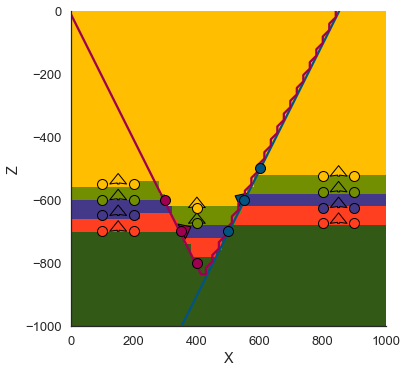

In [12]:
gp.plot.plot_section(geo_model, 25,  show_data=True)

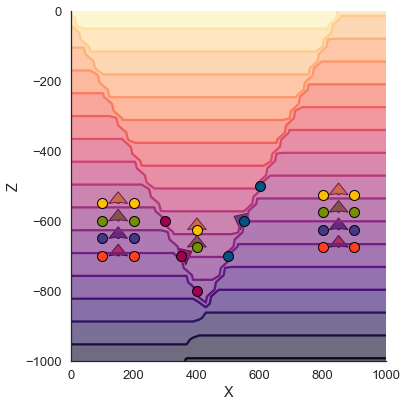

In [13]:
gp.plot.plot_scalar_field(geo_model, 25, series=2)

### Offset parameter

In [14]:
geo_model.interpolator.theano_graph.offset.set_value(1)
gp.compute_model(geo_model, compute_mesh=False)


Lithology ids 
  [7. 7. 7. ... 3. 3. 3.] 

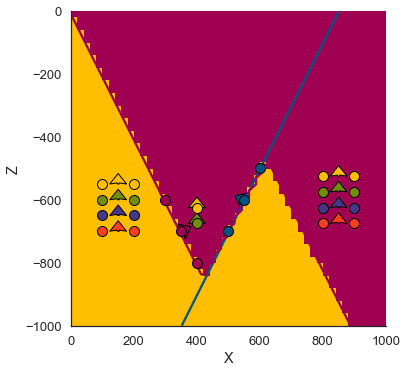

In [15]:
gp.plot.plot_section(geo_model, 25, block=geo_model.solutions.block_matrix[1, 0, :125000], show_data=True)

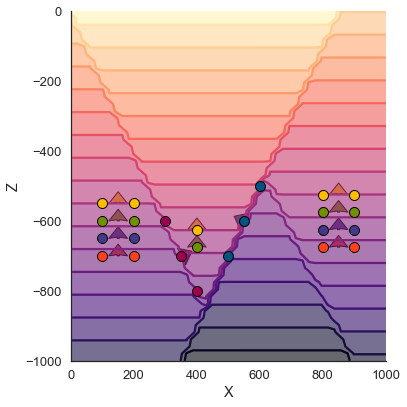

In [16]:
gp.plot.plot_scalar_field(geo_model, 25, series=2)

In [17]:
geo_model.solutions.scalar_field_matrix[1]

array([0.17363373, 0.1848186 , 0.19600352, ..., 1.36450254, 1.37569005,
       1.38687763])

In [18]:
geo_model.save_model('Tutorial_ch1-9b_Fault_relations')

True

### Finding the faults intersection:

Sometimes we need to find the voxels that containt the each fault. To do so we can use gempys functionality to find interfaces as follows. Lets use the first fault as an example:

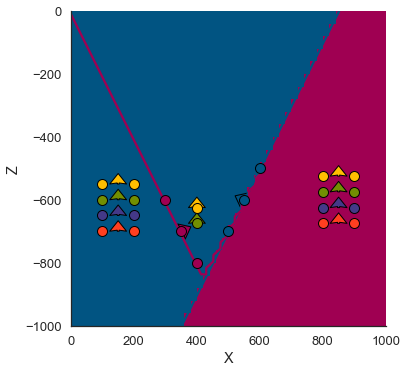

In [19]:
gp.plot.plot_section(geo_model, 25, block=geo_model.solutions.block_matrix[0, 0, :125000], show_data=True)

In [20]:
# Importing the function to find the interface
from gempy.utils.input_manipulation import find_interfaces_from_block_bottoms
import matplotlib.pyplot as plt

# Remember the fault block is stored on:
geo_model.solutions.block_matrix[0, 0, :125000]

array([1., 1., 1., ..., 2., 2., 2.])

In [21]:
# Now we can find where is the intersection of the values 1 by calling the following function. This will return
# Trues on those voxels on the intersection
intersection = find_interfaces_from_block_bottoms(
    geo_model.solutions.block_matrix[0, 0, :125000].reshape(50,50,50), 1,  shift= 1)

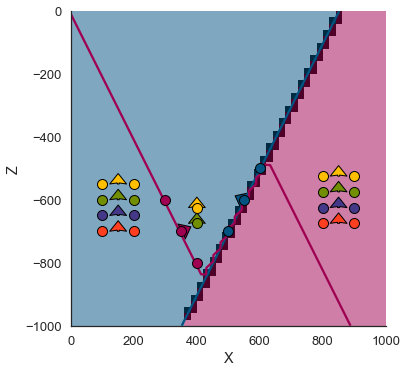

In [22]:
# We can manually plotting together to see exactly what we have done
ax = gp.plot.plot_section(geo_model, 25, block=geo_model.solutions.block_matrix[0, 0, :125000], show_data=True)
plt.imshow(intersection[:, 25, :].T, origin='bottom', extent=(0,1000,-1000,0), alpha=.5)
